In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
print(os.listdir("../input/cell_images/cell_images"))

['Uninfected', 'Parasitized']


In [2]:
Infected = os.listdir("../input/cell_images/cell_images/Parasitized")
Uninfected = os.listdir("../input/cell_images/cell_images/Uninfected")

In [3]:
Infected = Infected[:4000]
Uninfected = Uninfected[:4000]

In [4]:
data = []
label = []
#read the image, creating an object
for inf in Infected:
    
    img = cv2.imread("../input/cell_images/cell_images/Parasitized" + "/" + inf)
    
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        
        img_rs = np.array(img_rs)
        
        data.append(img_rs)
        label.append(0)
# plt.imshow(data[0])

In [5]:

#read the image, creating an object
for inf in Uninfected:
    
    img = cv2.imread("../input/cell_images/cell_images/Uninfected" + "/" + inf)
    
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        
        img_rs = np.array(img_rs)
        
        data.append(img_rs)
        label.append(1)


In [ ]:
plt.imshow(data[20000])

In [ ]:
plt.imshow(data[0])

In [6]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

Using TensorFlow backend.


In [7]:
cells = np.array(data)
labels = np.array(label)

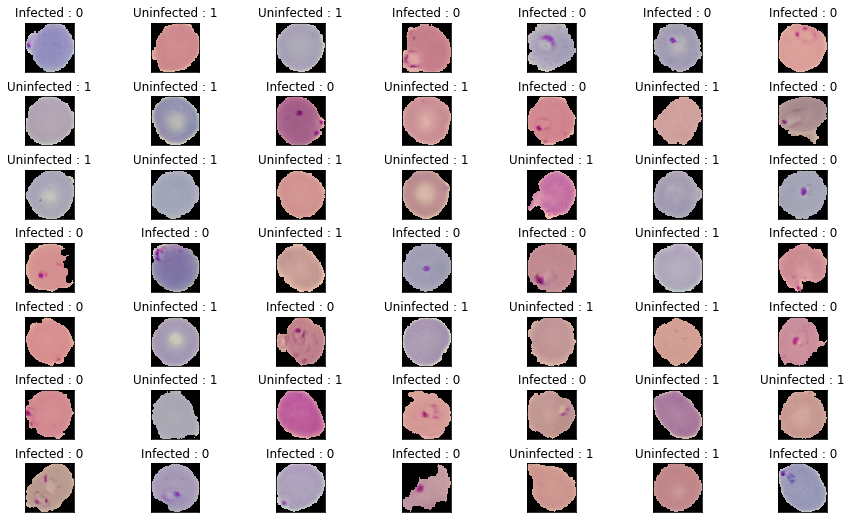

In [8]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Uninfected' if labels[r[0]] == 1 else 'Infected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [9]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

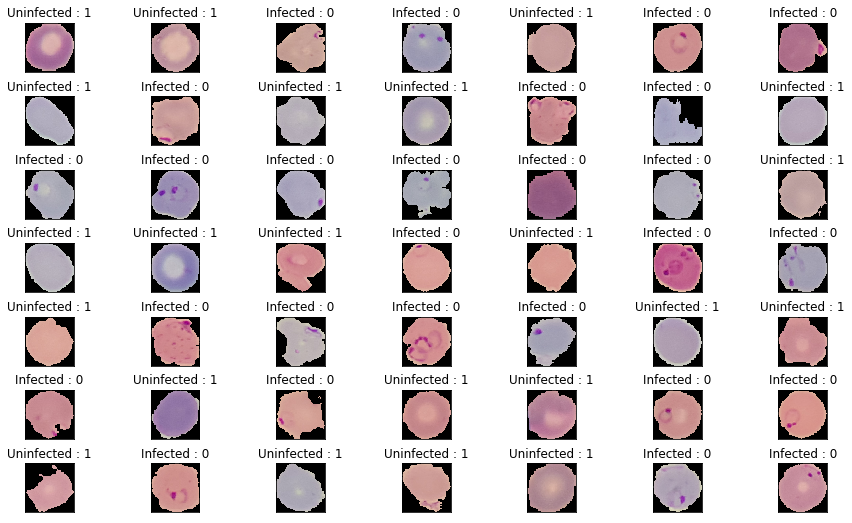

In [10]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
#     r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[i])
    plt.title('{} : {}'.format('Uninfected' if labels[i] == 1 else 'Infected' ,
                               labels[i]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [ ]:
from tensorflow.keras import optimizers

In [12]:
model = Sequential()

In [13]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [14]:
from sklearn.model_selection import train_test_split
train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(lr=0.001), 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
__________

In [16]:
history=model.fit(train_x, train_y, 
          epochs=50, 
          validation_data=(x, y))

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 18s 3ms/step - loss: 1.3870 - acc: 0.5897 - val_loss: 1.2258 - val_acc: 0.5875
Epoch 2/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.6342 - acc: 0.7363 - val_loss: 0.5066 - val_acc: 0.8275
Epoch 3/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.3786 - acc: 0.8492 - val_loss: 0.2439 - val_acc: 0.9244
Epoch 4/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.2920 - acc: 0.8864 - val_loss: 0.1690 - val_acc: 0.9337
Epoch 5/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.2376 - acc: 0.9113 - val_loss: 0.4243 - val_acc: 0.7950
Epoch 6/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.2163 - acc: 0.9206 - val_loss: 0.1995 - val_acc: 0.9287
Epoch 7/50
6400/6400 [==============================] - 9s 1ms/step - loss: 0.2085 - acc: 0.9220 - val_loss: 0.3174 - val_acc: 0.8525
Epoch 8/50
64

In [17]:
score = model.evaluate(x, y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

Test loss: 0.13941599105950445
Test accuracy: 0.964375



In [18]:
import numpy as np
predictions = model.predict(x)
print(np.argmax(predictions[0]))

1


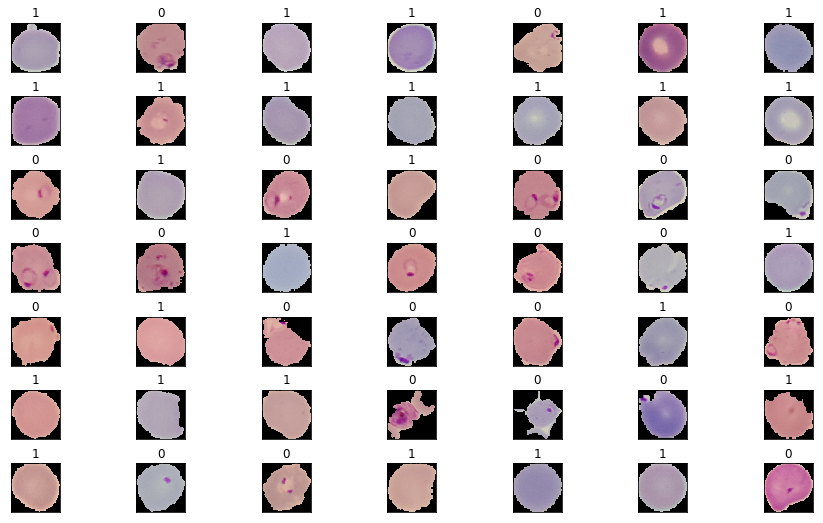

In [22]:
import matplotlib.pyplot as plt
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.title(np.argmax(predictions[i]))
    plt.imshow(x[i])
    plt.xticks([]) , plt.yticks([])
plt.show()